한글 필요하려나

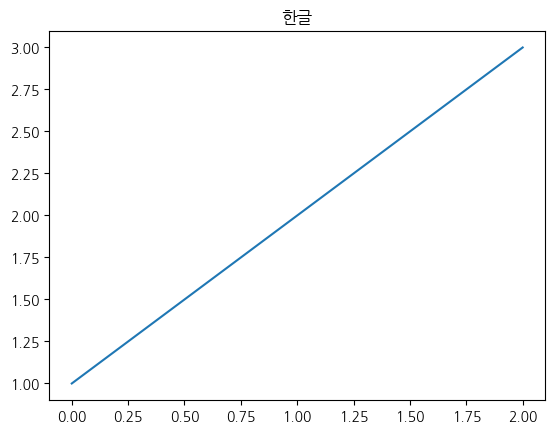

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

In [3]:
# 데이터불러오기

In [2]:
import pandas as pd

df = pd.read_csv('data/울산_전처리_ver5.csv')


# 액체화물만 불러오기
(향후 한계점에 컨테이너선이나 벌크선에도 미량이지만(0.01? 0.1퍼센트) 액체화물이 실려온다느 것을 언급정도?, 그정도면 한계점도 아니지만 자리 채울 수 있으니 좋다)

In [5]:
condition = df['선박용도'].isin(['석유제품 운반선', '케미칼 운반선', '기타 유조선', 'LPG 운반선', '원유운반선', '케미칼가스 운반선', 'LNG 운반선'])
selected_rows = df[condition]

In [8]:
selected_rows.columns

Index(['항명', '호출부호', '선박명', '입항횟수_연도', '입항횟수_횟수', '구분', '입출', '총톤수_x', '입항일시',
       '출항일시', '수리일시', '항해구분', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도', '순번',
       '시설사용횟수', '신고톤수', '지정시설_코드', '지정시설_번호', '지정시설명', '지정일시(FROM)',
       '지정일시(TO)', '사용목적명', '예보일시', '허가유무', '접안_대기시간', 'Service_Time_End',
       'Anchor', 'Service_Time_Start', 'Service_Time', '접안_대기시간_NumDays',
       'Service_Time_NumDays', '접안_대기시간_일', '접안_대기시간_시간', '접안_대기시간_분',
       'Service_Time_일', 'Service_Time_시간', 'Service_Time_분', '대기율', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)',
       '선박국적(code)', '선박국적(이름)', 'ETA_Year', 'ETA_Month', 'ETA_Day',
       'ETA_Hour', 'ETA_Minute', '일시', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
       '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
       '평균파고(m)', '파주기(sec)', '파향(deg)'],
      dtype='object')

In [9]:
selected_rows.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118277 entries, 0 to 143528
Data columns (total 67 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   항명                    118277 non-null  object 
 1   호출부호                  118277 non-null  object 
 2   선박명                   118277 non-null  object 
 3   입항횟수_연도               118277 non-null  float64
 4   입항횟수_횟수               118277 non-null  float64
 5   구분                    118277 non-null  object 
 6   입출                    118277 non-null  object 
 7   총톤수_x                 118277 non-null  object 
 8   입항일시                  118277 non-null  object 
 9   출항일시                  118277 non-null  object 
 10  수리일시                  118272 non-null  object 
 11  항해구분                  118277 non-null  object 
 12  계선장소_코드               118277 non-null  object 
 13  계선장소_숫자               118277 non-null  int64  
 14  계선장소명                 118277 non-null  object 
 15  선박용도 

In [ ]:
selected_rows.isnull().sum()

# 모델용 데이터프레임 만들기 
가장 좌측(식별자?) 그다음 Y값 그 이후로는 X값들이 오는 느낌으로

In [17]:
MDF_1 = selected_rows[['호출부호', '입항횟수_연도', '입항횟수_횟수', '총톤수_x', '입항일시', '출항일시', '항해구분',
                     '계선장소명', '선박용도', '시설사용횟수', '지정시설명', '사용목적명', '접안_대기시간',
                     '접안_대기시간_분', 'Service_Time_분', '재화중량톤수', '선박제원(총길이, m)',
                     '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)', '선박국적(이름)',
                     'ETA_Hour', 'ETA_Minute', '일시', '풍속(m/s)', '풍향(deg)', 'GUST풍속(m/s)',
                     '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)', '유의파고(m)',
                     '평균파고(m)', '파주기(sec)', '파향(deg)']]

In [18]:
MDF_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118277 entries, 0 to 143528
Data columns (total 37 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   호출부호            118277 non-null  object 
 1   입항횟수_연도         118277 non-null  float64
 2   입항횟수_횟수         118277 non-null  float64
 3   총톤수_x           118277 non-null  object 
 4   입항일시            118277 non-null  object 
 5   출항일시            118277 non-null  object 
 6   항해구분            118277 non-null  object 
 7   계선장소명           118277 non-null  object 
 8   선박용도            118277 non-null  object 
 9   시설사용횟수          116396 non-null  float64
 10  지정시설명           116396 non-null  object 
 11  사용목적명           116396 non-null  object 
 12  접안_대기시간         118277 non-null  object 
 13  접안_대기시간_분       118277 non-null  int64  
 14  Service_Time_분  118277 non-null  int64  
 15  재화중량톤수          97474 non-null   object 
 16  선박제원(총길이, m)    117588 non-null  float64
 17  선박제원(너비, m)    

In [20]:
MDF_1.isnull().sum()

호출부호                  0
입항횟수_연도               0
입항횟수_횟수               0
총톤수_x                 0
입항일시                  0
출항일시                  0
항해구분                  0
계선장소명                 0
선박용도                  0
시설사용횟수             1881
지정시설명              1881
사용목적명              1881
접안_대기시간               0
접안_대기시간_분             0
Service_Time_분        0
재화중량톤수            20803
선박제원(총길이, m)        689
선박제원(너비, m)         689
만재흘수(m)           19429
깊이(m)             19429
길이1(m)            19429
선박국적(이름)          19429
ETA_Hour              0
ETA_Minute            0
일시                 4421
풍속(m/s)            9692
풍향(deg)           10928
GUST풍속(m/s)        9402
현지기압(hPa)          4743
습도(%)              7133
기온(°C)             4590
수온(°C)             5887
최대파고(m)            4566
유의파고(m)            4677
평균파고(m)            4765
파주기(sec)           4635
파향(deg)            4612
dtype: int64

# 향후 계획
- Y는 접안_대기시간_분

- 계선장소, 사용하려는 시설별로 대기시간에 영향을 끼치지는 않았을까? 근데 이거를 어떻게 구분할지를 모르겠네 T/F, 0과1도 아니고...

- 풍속 풍향 기압 등 날씨 칼럼들은 전시간 후 시간의 평균 등으로 null 채울 예정

- 아 일시 없는게 있었네 => 다시 불러와서 ETA로 채우기
    - 분말고 시간으로 왜냐면 과거의 날씨들을 뚫고 항구로 들어온거니까 1시간정도는..뭐